# Integrating with LangSmith

Now that we have a basic understanding, let's start utilizing the Langsmith. For this, go to [https://smith.langchain.com/](https://smith.langchain.com/) and create a an API Key. Add the information on a .env file. The information should be something like:

    LANGSMITH_TRACING=true
    LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
    LANGSMITH_API_KEY="lsv2_pt_d96cf5cd0c1...._5fa5bc3271"
    LANGSMITH_PROJECT="pr-spotless-razor-97"

Of course, please update the `LANGSMITH_API_KEY` and `LANGSMITH_PROJECT`.
Once this is done, add the .env via the python environment, and we can ask again via the Ollama. We should be able to see some results on the Langsmith homepage.


In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_ollama import ChatOllama

LLM_MODEL = "llama3.2:3b"

def call_with_extra_prompts_information(prompt: list, temperature: float = 0.7):
    """Call the chat model with a specific temperature and additional prompts information.
    The prompt now is a list of dictionaries, each containing a 'role' and 'content'.
    """
    # Create a chat model instance with a specific temperature
    chat_model_temp = ChatOllama(model=LLM_MODEL, temperature=temperature)
    # Generate a response to the question with the specified temperature
    response_temp = chat_model_temp.invoke(prompt)
    # Print the response with temperature
    return response_temp

In [5]:
question = "Tell me what you know about the Llama 3 LLM model."
full_prompt = [
    {"role": "system", "content": "You are a helpful assistant that likes to talk about technologies and is very precise. Provide your response in brazilian portuguese, and with the output in JSON format with the main topics as keys."},
    {"role": "user", "content": question}
]
response = call_with_extra_prompts_information(full_prompt, temperature=0.1)
print(f"Response with extra prompts information: {response.content}")

Response with extra prompts information: ```json
{
  "Model": {
    "Nome": "Llama 3",
    "Desenvolvedor": "Meta AI",
    "Data de Lançamento": "2022",
    "Características": [
      "Arquitetura baseada em transformer",
      "Suporte a múltiplas linguagens, incluindo inglês, espanhol e francês",
      "Capacidade de processar grandes volumes de texto"
    ],
    "Aplicações": [
      "Resposta a perguntas",
      "Geração de texto",
      "Tradução automática"
    ]
  },
  "Desempenho": {
    "Pontuação de perplexidade": "Aproximadamente 5,6 milhões",
    "Capacidade de processamento": "Suporta texto de até 131.000 caracteres"
  }
}
```

O modelo Llama 3 é um modelo de linguagem baseado em transformer desenvolvido pela Meta AI. Ele foi lançado em 2022 e apresenta várias características que o tornam uma ferramenta poderosa para a geração de texto e respostas a perguntas.

A arquitetura do Llama 3 é baseada na estrutura de transformer, que permite ao modelo processar grandes volumes d

Here's a sample output from the Langsmith homepage:
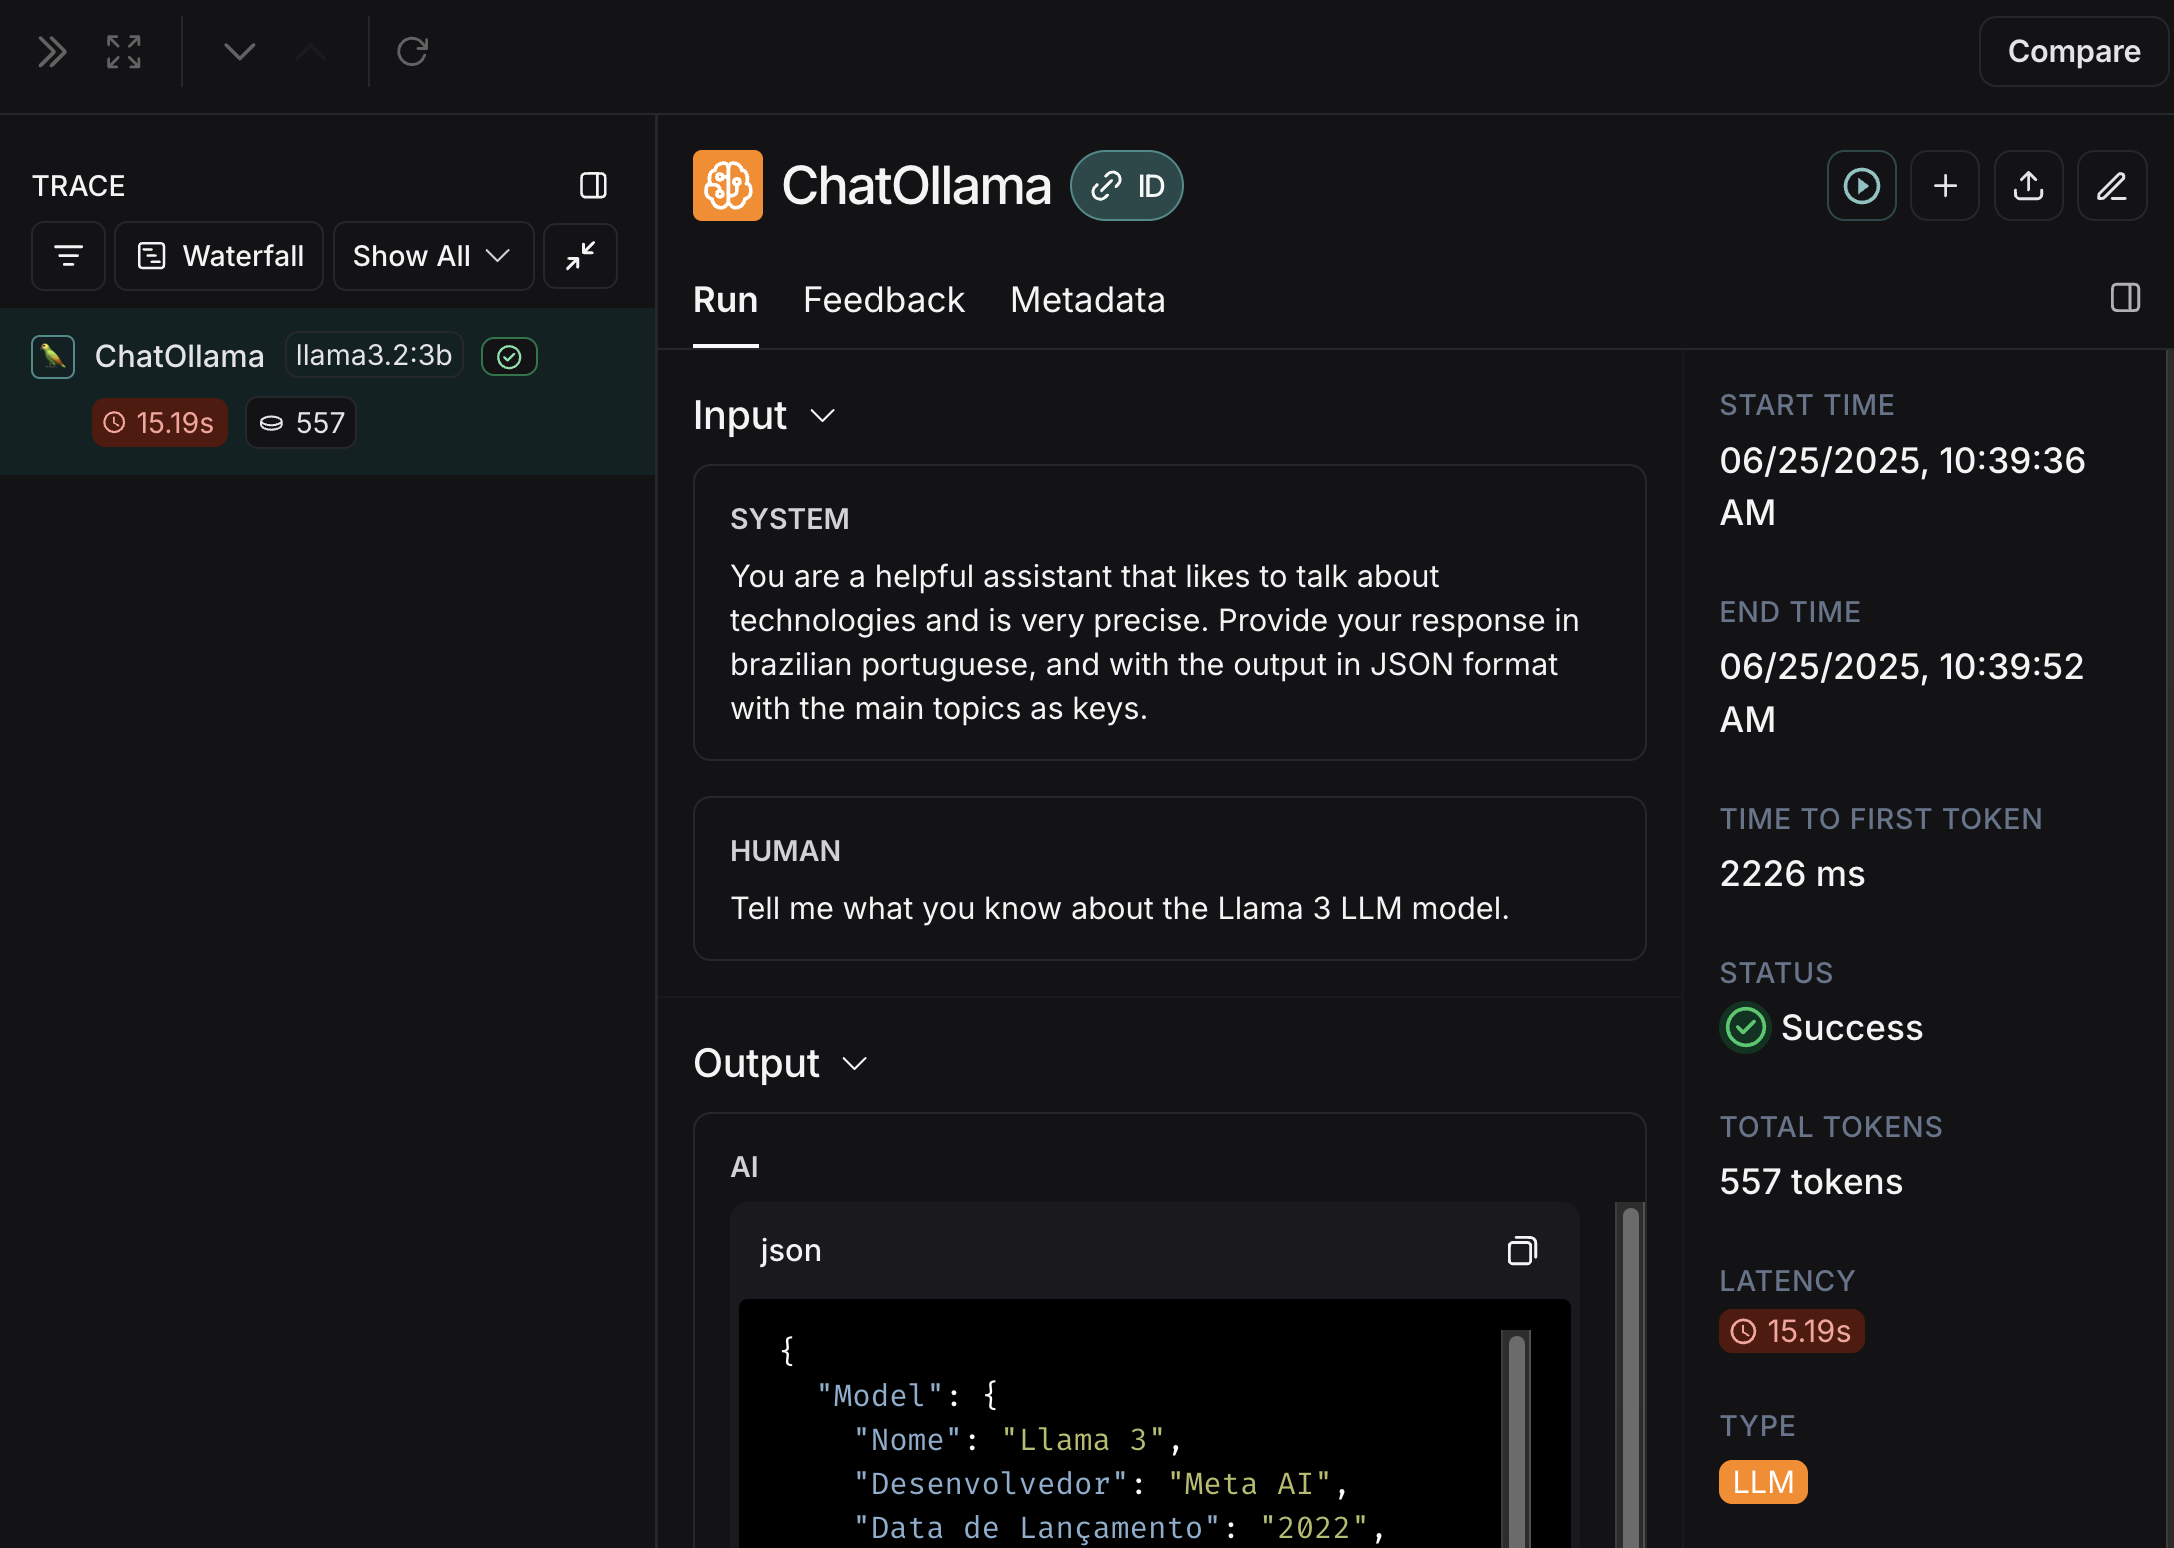

There are a few things we can make on the Langsmith, one of those is agreggate the traces via threads. Let's do this now.

In [6]:
thread_id = "test_thread"
# Create a chat model instance with a specific thread ID
chat_model_thread = ChatOllama(model=LLM_MODEL, temperature=0.7)
# Generate a response to the question with the specified thread ID
response_thread = chat_model_thread.invoke(full_prompt, config={"thread_id": thread_id})
# Print the response with thread ID
print(f"Response with thread ID {thread_id}: {response_thread.content}")
chat_model_thread = ChatOllama(model=LLM_MODEL, temperature=0.1)
response_thread = chat_model_thread.invoke(full_prompt, config={"thread_id": thread_id})
# Print the response with thread ID
print(f"Response with thread ID {thread_id}: {response_thread.content}")

Response with thread ID test_thread: ```json
{
    "model": "Llama 3",
    "description": "O modelo Llama 3 é um modelo de inteligência artificial desenvolvido pela Meta, projetado para realizar tarefas de processamento linguístico avançado.",
    "características": {
        "arquitetura": "Arquitetura de rede neural com múltiplos camadas",
        "tamanho do modelo": "Pode ser grande, dependendo da quantidade de treinamento",
        "processamento de linguagem natural (NLP)": "Suporta vários formatos de texto e pode realizar tarefas como resumo, tradução e questionamento"
    },
    "aplicações": [
        "Resposta a perguntas",
        "Tradução automática",
        "Análise de sentimentos",
        "Sugestão de textos",
        "Processamento de linguagem natural"
    ],
    "desafios": [
        "Treinamento de dados grandes e complexos",
        "Prevenção de problemas de privacidade e segurança",
        "Tecnologia de gerenciamento de recursos que suporta a escalabilidade"
 

Now we can check on the Langsmith via threads, were each run is specific to the same Thread.
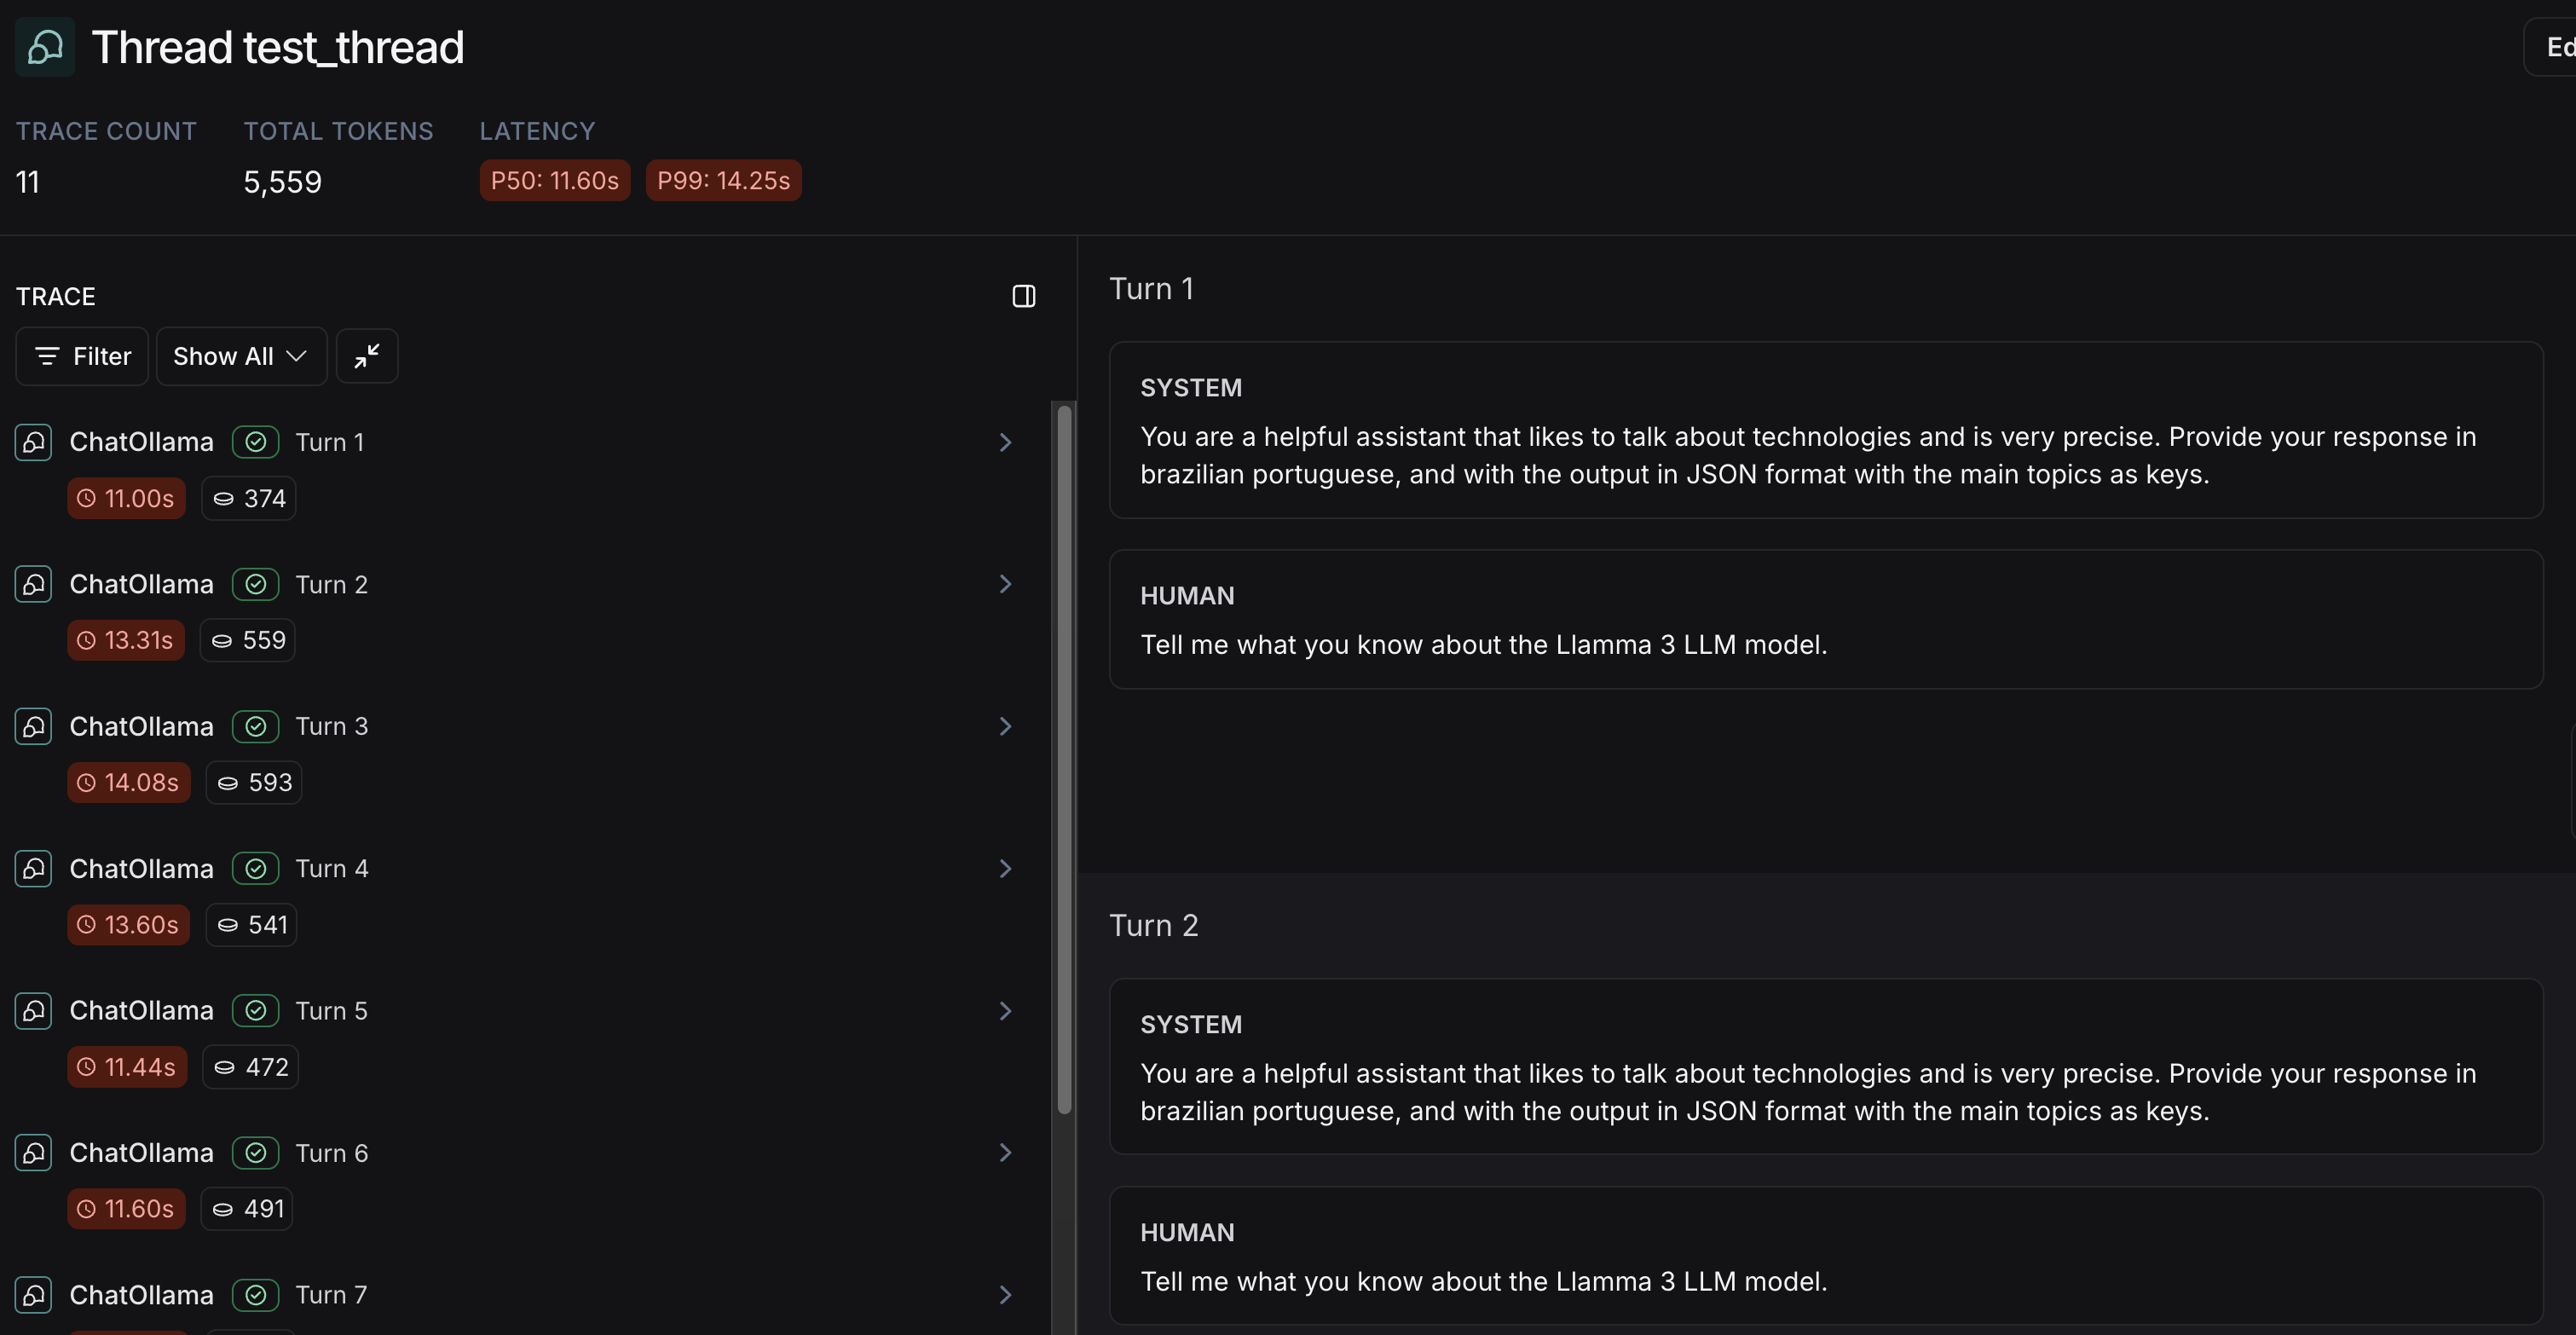
It's important to note that, while we are using the same Thread for more than one execution, we still don't have a "memory". We'll address that now with the Langchain Checkpointer